# SKY130 raw data visualization

<a href="https://colab.research.google.com/github/skywater-pdk-sky130-raw-data/blob/main/notebooks/sky130-raw-data-viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
Copyright 2022 Google LLC.
SPDX-License-Identifier: Apache-2.0
```

## Get data

In [2]:
!git clone https://github.com/google/skywater-pdk-sky130-raw-data

Cloning into 'skywater-pdk-sky130-raw-data'...
remote: Enumerating objects: 1013, done.
remote: Counting objects: 100% (1013/1013), done.
remote: Compressing objects: 100% (1010/1010), done.
remote: Total 1013 (delta 3), reused 1012 (delta 2), pack-reused 0
Receiving objects: 100% (1013/1013), 10.04 MiB | 15.81 MiB/s, done.
Resolving deltas: 100% (3/3), done.


## Install DeviceModelingToolkit

[DeviceModelingToolkit](https://dmt-development.gitlab.io/dmt-core/index.html) (DMT) is a Python tool targeted at helping modeling engineers extract model parameters, run circuit and TCAD simulations and automate their infrastructure.


In [3]:
!python3 -m pip install DMT-core

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Read measurement data

In [221]:
import pathlib
import pandas as pd
import DMT.core

cells_dir = pathlib.Path('skywater-pdk-sky130-raw-data/sky130_fd_pr/cells')
cell_dir = cells_dir / 'nfet_g5v0d10v5'
mdm_path = cell_dir / 'sky130_fd_pr__nfet_g5v0d10v5_w0p420u_l0p500u_m1(2618_1_10_IDVD_D3).mdm'

measurement = DMT.core.DutMeas(
    database_dir=None,
    dut_type=DMT.core.DutType.device,
    name=mdm_path.stem,
    reference_node='E')

measurement.add_data(pathlib.Path(mdm_path),
                     key=mdm_path.stem)
df = measurement.data[mdm_path.stem]
df

,VD,ID,IB,IG,VG,VS,VB
0,0.00,2.365400e-09,-1.307500e-08,5.041000e-10,0.0,0.0,0.0
1,0.05,1.458200e-09,1.295100e-08,-1.421600e-09,0.0,0.0,0.0
2,0.10,-1.422400e-09,-1.316900e-08,1.411500e-09,0.0,0.0,0.0
3,0.15,1.382200e-09,1.322100e-08,-1.412400e-09,0.0,0.0,0.0
4,0.20,-1.351400e-09,-1.330800e-08,1.324900e-09,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1207,4.80,1.037940e-03,-2.192100e-08,-1.416600e-09,5.0,0.0,-2.5
1208,4.85,1.038710e-03,-2.839400e-08,-1.346300e-09,5.0,0.0,-2.5
1209,4.90,1.039530e-03,-3.606800e-08,-1.373700e-09,5.0,0.0,-2.5
1210,4.95,1.040320e-03,-4.450300e-08,-1.407800e-09,5.0,0.0,-2.5


## Plot current measurements

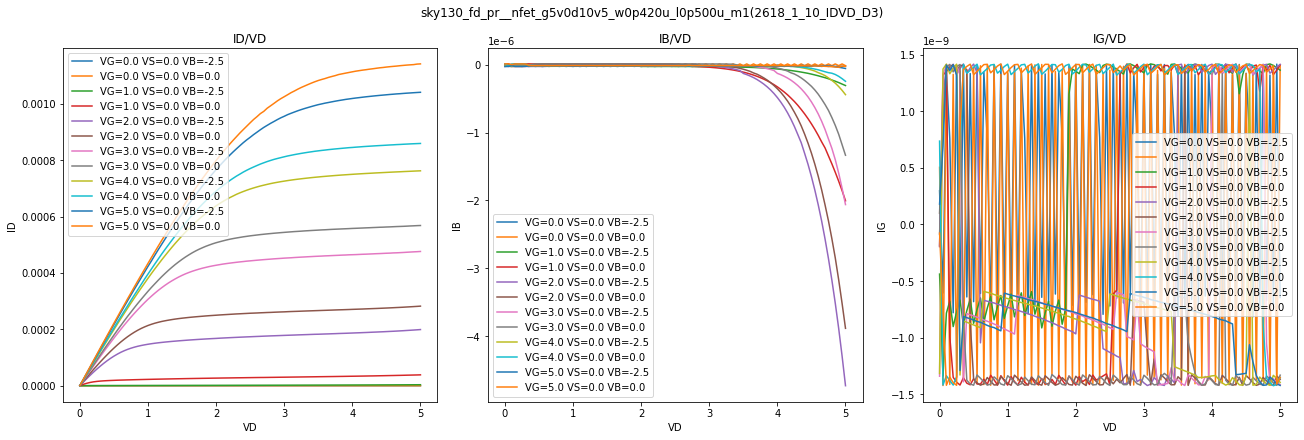

In [242]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

plots = dict(zip(['ID', 'IB', 'IG'], axs))

gb = df.groupby(['VG', 'VS', 'VB'])
for g in gb.groups:
  label = f'VG={g[0]} VS={g[1]} VB={g[2]}'
  for c, ax in plots.items():
    gdf = gb.get_group(g)[['VD', c]].rename(columns={c: label})
    gplt = gdf.plot(ax=ax, x='VD')
    gplt.set_title(f'{c}/VD')
    gplt.set_ylabel(c)

fig.suptitle(mdm_path.stem)
fig.show()